In [171]:
import numpy
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.optimizers import Adam
from keras.optimizers import SGD
from sklearn.metrics import r2_score

In [122]:
Data = pd.read_csv('Real_Combine.csv')
Data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [123]:
Data.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1092.000000
mean,26.009241,32.482251,19.460201,1008.081885,62.918573,2.003111,6.751510,15.805124,109.090984
std,7.237401,6.679078,7.438653,7.529237,15.709816,0.747541,3.841137,7.308435,84.465790
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,19.300000,27.800000,12.100000,1001.100000,54.000000,1.600000,3.700000,11.100000,41.833333
50%,28.200000,34.200000,21.200000,1008.100000,64.000000,1.900000,6.500000,14.800000,83.458333
75%,31.700000,37.000000,26.000000,1015.000000,74.000000,2.600000,9.100000,18.300000,158.291667
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


In [124]:
Data["PM 2.5"]=Data["PM 2.5"].fillna(Data["PM 2.5"].mean())
Data.isnull().any() 

T         False
TM        False
Tm        False
SLP       False
H         False
VV        False
V         False
VM        False
PM 2.5    False
dtype: bool

In [125]:
DataFrame = Data.values
X = DataFrame[:,0:8]
y = DataFrame[:,8:9]

In [126]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [127]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [138]:
model1 = Sequential()
model1.add(Dense(units=128,kernel_initializer='he_normal',activation='relu',input_dim=8))
model1.add(Dense(units=64,kernel_initializer='he_normal',activation='relu'))
model1.add(Dense(units=1,kernel_initializer='glorot_normal',activation='linear'))
model1.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


In [140]:
Result1 = model1.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)

Epoch 1/100
22/22 [==============================] - ETA: 0s - loss: 17299.8984 - mean_squared_error: 17299.89 - ETA: 1s - loss: 18322.4629 - mean_squared_error: 18322.46 - ETA: 1s - loss: 17425.9688 - mean_squared_error: 17425.96 - ETA: 0s - loss: 17577.0488 - mean_squared_error: 17577.04 - ETA: 0s - loss: 16943.3066 - mean_squared_error: 16943.30 - 2s 76ms/step - loss: 16943.3066 - mean_squared_error: 16943.3066 - val_loss: 21386.6934 - val_mean_squared_error: 21386.6934
Epoch 2/100
22/22 [==============================] - ETA: 0s - loss: 18976.4766 - mean_squared_error: 18976.47 - ETA: 0s - loss: 14680.5420 - mean_squared_error: 14680.54 - 0s 7ms/step - loss: 14666.0332 - mean_squared_error: 14666.0332 - val_loss: 18061.0820 - val_mean_squared_error: 18061.0820
Epoch 3/100
22/22 [==============================] - ETA: 0s - loss: 16578.9219 - mean_squared_error: 16578.92 - ETA: 0s - loss: 11595.3750 - mean_squared_error: 11595.37 - 0s 10ms/step - loss: 11478.0957 - mean_squared_error

Epoch 30/100
22/22 [==============================] - ETA: 0s - loss: 2735.4775 - mean_squared_error: 2735.47 - ETA: 0s - loss: 2761.0566 - mean_squared_error: 2761.05 - 0s 4ms/step - loss: 2761.0566 - mean_squared_error: 2761.0566 - val_loss: 3507.3093 - val_mean_squared_error: 3507.3093
Epoch 31/100
22/22 [==============================] - ETA: 0s - loss: 2620.3994 - mean_squared_error: 2620.39 - ETA: 0s - loss: 2729.8423 - mean_squared_error: 2729.84 - 0s 4ms/step - loss: 2729.8423 - mean_squared_error: 2729.8423 - val_loss: 3480.2053 - val_mean_squared_error: 3480.2053
Epoch 32/100
22/22 [==============================] - ETA: 0s - loss: 2232.4219 - mean_squared_error: 2232.42 - ETA: 0s - loss: 2568.7786 - mean_squared_error: 2568.77 - 0s 5ms/step - loss: 2698.8364 - mean_squared_error: 2698.8364 - val_loss: 3458.1665 - val_mean_squared_error: 3458.1665
Epoch 33/100
22/22 [==============================] - ETA: 0s - loss: 1594.8098 - mean_squared_error: 1594.80 - 0s 5ms/step - loss

22/22 [==============================] - ETA: 0s - loss: 1550.1805 - mean_squared_error: 1550.18 - 0s 3ms/step - loss: 1887.5099 - mean_squared_error: 1887.5099 - val_loss: 2901.1792 - val_mean_squared_error: 2901.1792
Epoch 97/100
22/22 [==============================] - ETA: 0s - loss: 1460.4249 - mean_squared_error: 1460.42 - 0s 3ms/step - loss: 1872.9299 - mean_squared_error: 1872.9299 - val_loss: 2893.3713 - val_mean_squared_error: 2893.3713
Epoch 98/100
22/22 [==============================] - ETA: 0s - loss: 2840.7751 - mean_squared_error: 2840.77 - 0s 3ms/step - loss: 1868.7662 - mean_squared_error: 1868.7662 - val_loss: 2901.9805 - val_mean_squared_error: 2901.9805
Epoch 99/100
22/22 [==============================] - ETA: 0s - loss: 1328.2834 - mean_squared_error: 1328.28 - ETA: 0s - loss: 1899.9834 - mean_squared_error: 1899.98 - 0s 5ms/step - loss: 1859.4869 - mean_squared_error: 1859.4869 - val_loss: 2878.0874 - val_mean_squared_error: 2878.0874
Epoch 100/100
22/22 [======

In [163]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
y_pred = model1.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error : ', mse)
print('Mean absolute error : ', mae)
print('r2_score : ', r2)

Mean squared error :  2447.714137870074
Mean absolute error :  36.414600730160714
r2_score :  0.6466636623631872


In [129]:
# Use Keras tuner for finding out optimal parameters
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [130]:
def tuner_model(hp):                      # hp is assigned here connects with RandomSearch
    model = keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model.add(layers.Dense(units=hp.Int('units_'+str(i),min_value=16,max_value=512,step=16),activation='relu'))
    model.add(layers.Dense(units=1,activation='linear')) # for regession , output layer Activation function is usually linear
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[0.01,0.001,0.0001])),
                 loss='mean_absolute_error',metrics=['mean_absolute_error'])
    return model   

In [131]:
# Setting tuner
tuner = RandomSearch(tuner_model,objective='val_mean_absolute_error',max_trials=5,executions_per_trial=3)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [146]:
# Run the tuner
tuner.search(X_train_scaled, y_train, epochs=5, validation_data=(X_test_scaled, y_test))

INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [145]:
tuner.results_summary()

In [176]:
model2 = Sequential()
model2.add(Dense(units=64,kernel_initializer='he_normal',activation='relu',input_dim=8))
model2.add(Dense(units=496,kernel_initializer='he_normal',activation='relu'))
model2.add(Dense(units=32,kernel_initializer='he_normal',activation='relu'))
model2.add(Dense(units=384,kernel_initializer='he_normal',activation='relu'))
model2.add(Dense(units=320,kernel_initializer='he_normal',activation='relu'))
model2.add(Dense(units=64,kernel_initializer='he_normal',activation='relu'))
model2.add(Dense(units=256,kernel_initializer='he_normal',activation='relu'))
model2.add(Dense(units=288,kernel_initializer='he_normal',activation='relu'))
model2.add(Dense(units=176,kernel_initializer='he_normal',activation='relu'))
model2.add(Dense(units=336,kernel_initializer='he_normal',activation='relu'))
model2.add(Dense(units=400,kernel_initializer='he_normal',activation='relu'))
model2.add(Dense(units=80,kernel_initializer='he_normal',activation='relu'))
model2.add(Dense(units=352,kernel_initializer='he_normal',activation='relu'))
model2.add(Dense(units=64,kernel_initializer='he_normal',activation='relu'))
model2.add(Dense(units=144,kernel_initializer='he_normal',activation='relu'))
model2.add(Dense(units=208,kernel_initializer='he_normal',activation='relu'))
model2.add(Dense(units=336,kernel_initializer='he_normal',activation='relu'))
model2.add(Dense(units=96,kernel_initializer='he_normal',activation='relu'))
model2.add(Dense(units=432,kernel_initializer='he_normal',activation='relu'))
model2.add(Dense(units=384,kernel_initializer='he_normal',activation='relu'))
model2.add(Dense(units=1,kernel_initializer='glorot_normal',activation='linear'))
opt=Adam(lr=0.0001)
model2.compile(optimizer=opt,loss='mean_squared_error',metrics=['mean_squared_error'])
model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_137 (Dense)            (None, 64)                576       
_________________________________________________________________
dense_138 (Dense)            (None, 496)               32240     
_________________________________________________________________
dense_139 (Dense)            (None, 32)                15904     
_________________________________________________________________
dense_140 (Dense)            (None, 384)               12672     
_________________________________________________________________
dense_141 (Dense)            (None, 320)               123200    
_________________________________________________________________
dense_142 (Dense)            (None, 64)                20544     
_________________________________________________________________
dense_143 (Dense)            (None, 256)              

In [177]:
Result2 = model2.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)

Epoch 1/100
22/22 [==============================] - ETA: 1s - loss: 23821.9375 - mean_squared_error: 23821.93 - ETA: 16s - loss: 15584.7539 - mean_squared_error: 15584.753 - ETA: 11s - loss: 15011.8906 - mean_squared_error: 15011.890 - ETA: 9s - loss: 16113.2666 - mean_squared_error: 16113.266 - ETA: 7s - loss: 15438.5518 - mean_squared_error: 15438.55 - ETA: 6s - loss: 15458.0625 - mean_squared_error: 15458.06 - ETA: 5s - loss: 15228.2676 - mean_squared_error: 15228.26 - ETA: 5s - loss: 15386.5986 - mean_squared_error: 15386.59 - ETA: 4s - loss: 15493.6807 - mean_squared_error: 15493.68 - ETA: 4s - loss: 15261.5498 - mean_squared_error: 15261.54 - ETA: 3s - loss: 15112.5791 - mean_squared_error: 15112.57 - ETA: 3s - loss: 15199.3115 - mean_squared_error: 15199.31 - ETA: 2s - loss: 14899.9053 - mean_squared_error: 14899.90 - ETA: 1s - loss: 15100.6934 - mean_squared_error: 15100.69 - ETA: 1s - loss: 14544.5420 - mean_squared_error: 14544.54 - ETA: 0s - loss: 13891.3545 - mean_squared_

22/22 [==============================] - ETA: 0s - loss: 2072.3623 - mean_squared_error: 2072.36 - ETA: 0s - loss: 2191.7297 - mean_squared_error: 2191.72 - ETA: 0s - loss: 2444.6060 - mean_squared_error: 2444.60 - ETA: 0s - loss: 2256.1746 - mean_squared_error: 2256.17 - ETA: 0s - loss: 2363.7212 - mean_squared_error: 2363.72 - ETA: 0s - loss: 2236.8232 - mean_squared_error: 2236.82 - ETA: 0s - loss: 2264.9929 - mean_squared_error: 2264.99 - ETA: 0s - loss: 2239.0974 - mean_squared_error: 2239.09 - ETA: 0s - loss: 2127.8533 - mean_squared_error: 2127.85 - ETA: 0s - loss: 2124.9531 - mean_squared_error: 2124.95 - ETA: 0s - loss: 2127.7957 - mean_squared_error: 2127.79 - ETA: 0s - loss: 2334.4958 - mean_squared_error: 2334.49 - ETA: 0s - loss: 2402.0464 - mean_squared_error: 2402.04 - ETA: 0s - loss: 2387.5391 - mean_squared_error: 2387.53 - 1s 66ms/step - loss: 2387.5391 - mean_squared_error: 2387.5391 - val_loss: 3449.4622 - val_mean_squared_error: 3449.4622
Epoch 8/100
22/22 [=======

22/22 [==============================] - ETA: 0s - loss: 1903.3943 - mean_squared_error: 1903.39 - ETA: 0s - loss: 1611.9591 - mean_squared_error: 1611.95 - ETA: 0s - loss: 1477.1592 - mean_squared_error: 1477.15 - ETA: 0s - loss: 1301.3025 - mean_squared_error: 1301.30 - ETA: 0s - loss: 1387.5889 - mean_squared_error: 1387.58 - ETA: 0s - loss: 1528.4095 - mean_squared_error: 1528.40 - ETA: 0s - loss: 1550.6699 - mean_squared_error: 1550.66 - ETA: 0s - loss: 1574.1255 - mean_squared_error: 1574.12 - ETA: 0s - loss: 1593.0581 - mean_squared_error: 1593.05 - ETA: 0s - loss: 1582.3867 - mean_squared_error: 1582.38 - ETA: 0s - loss: 1664.9025 - mean_squared_error: 1664.90 - ETA: 0s - loss: 1646.3870 - mean_squared_error: 1646.38 - ETA: 0s - loss: 1598.6276 - mean_squared_error: 1598.62 - ETA: 0s - loss: 1677.9896 - mean_squared_error: 1677.98 - ETA: 0s - loss: 1673.3519 - mean_squared_error: 1673.35 - ETA: 0s - loss: 1637.6469 - mean_squared_error: 1637.64 - ETA: 0s - loss: 1626.1882 - mea

22/22 [==============================] - ETA: 0s - loss: 842.5591 - mean_squared_error: 842.55 - ETA: 0s - loss: 855.8065 - mean_squared_error: 855.80 - ETA: 0s - loss: 1022.1340 - mean_squared_error: 1022.13 - ETA: 0s - loss: 1137.3538 - mean_squared_error: 1137.35 - ETA: 0s - loss: 1259.8755 - mean_squared_error: 1259.87 - ETA: 0s - loss: 1198.1825 - mean_squared_error: 1198.18 - ETA: 0s - loss: 1139.3876 - mean_squared_error: 1139.38 - ETA: 0s - loss: 1092.0708 - mean_squared_error: 1092.07 - ETA: 0s - loss: 1081.5289 - mean_squared_error: 1081.52 - ETA: 0s - loss: 1089.5498 - mean_squared_error: 1089.54 - ETA: 0s - loss: 1042.9034 - mean_squared_error: 1042.90 - ETA: 0s - loss: 1110.7437 - mean_squared_error: 1110.74 - ETA: 0s - loss: 1076.2517 - mean_squared_error: 1076.25 - ETA: 0s - loss: 1119.1887 - mean_squared_error: 1119.18 - ETA: 0s - loss: 1129.8705 - mean_squared_error: 1129.87 - ETA: 0s - loss: 1102.4183 - mean_squared_error: 1102.41 - ETA: 0s - loss: 1094.0795 - mean_sq

Epoch 26/100
22/22 [==============================] - ETA: 0s - loss: 831.5737 - mean_squared_error: 831.57 - ETA: 0s - loss: 1077.8942 - mean_squared_error: 1077.89 - ETA: 0s - loss: 1062.0013 - mean_squared_error: 1062.00 - ETA: 0s - loss: 958.7144 - mean_squared_error: 958.7144 - ETA: 0s - loss: 885.8655 - mean_squared_error: 885.86 - ETA: 0s - loss: 852.2682 - mean_squared_error: 852.26 - ETA: 0s - loss: 824.1562 - mean_squared_error: 824.15 - ETA: 0s - loss: 790.8726 - mean_squared_error: 790.87 - ETA: 0s - loss: 765.7209 - mean_squared_error: 765.72 - ETA: 0s - loss: 756.6086 - mean_squared_error: 756.60 - ETA: 0s - loss: 723.9517 - mean_squared_error: 723.95 - ETA: 0s - loss: 724.8570 - mean_squared_error: 724.85 - ETA: 0s - loss: 780.7447 - mean_squared_error: 780.74 - ETA: 0s - loss: 780.4296 - mean_squared_error: 780.42 - ETA: 0s - loss: 767.3082 - mean_squared_error: 767.30 - ETA: 0s - loss: 783.5639 - mean_squared_error: 783.56 - ETA: 0s - loss: 770.2974 - mean_squared_erro

22/22 [==============================] - ETA: 0s - loss: 386.7323 - mean_squared_error: 386.73 - ETA: 0s - loss: 295.8124 - mean_squared_error: 295.81 - ETA: 0s - loss: 518.8705 - mean_squared_error: 518.87 - ETA: 0s - loss: 482.2509 - mean_squared_error: 482.25 - ETA: 0s - loss: 457.4037 - mean_squared_error: 457.40 - ETA: 0s - loss: 474.3607 - mean_squared_error: 474.36 - ETA: 0s - loss: 461.3922 - mean_squared_error: 461.39 - ETA: 0s - loss: 434.3009 - mean_squared_error: 434.30 - ETA: 0s - loss: 478.2803 - mean_squared_error: 478.28 - ETA: 0s - loss: 458.5910 - mean_squared_error: 458.59 - ETA: 0s - loss: 493.1605 - mean_squared_error: 493.16 - ETA: 0s - loss: 469.2780 - mean_squared_error: 469.27 - ETA: 0s - loss: 463.8769 - mean_squared_error: 463.87 - ETA: 0s - loss: 484.7358 - mean_squared_error: 484.73 - ETA: 0s - loss: 488.3017 - mean_squared_error: 488.30 - ETA: 0s - loss: 479.6867 - mean_squared_error: 479.68 - ETA: 0s - loss: 498.0490 - mean_squared_error: 498.04 - ETA: 0s

22/22 [==============================] - ETA: 0s - loss: 197.3428 - mean_squared_error: 197.34 - ETA: 0s - loss: 279.6886 - mean_squared_error: 279.68 - ETA: 0s - loss: 255.1497 - mean_squared_error: 255.14 - ETA: 0s - loss: 248.4189 - mean_squared_error: 248.41 - ETA: 0s - loss: 248.1187 - mean_squared_error: 248.11 - ETA: 0s - loss: 321.3940 - mean_squared_error: 321.39 - ETA: 0s - loss: 308.4512 - mean_squared_error: 308.45 - ETA: 0s - loss: 329.8042 - mean_squared_error: 329.80 - ETA: 0s - loss: 324.8307 - mean_squared_error: 324.83 - ETA: 0s - loss: 390.7461 - mean_squared_error: 390.74 - ETA: 0s - loss: 391.2918 - mean_squared_error: 391.29 - ETA: 0s - loss: 394.9751 - mean_squared_error: 394.97 - ETA: 0s - loss: 415.7693 - mean_squared_error: 415.76 - ETA: 0s - loss: 409.0457 - mean_squared_error: 409.04 - ETA: 0s - loss: 414.6108 - mean_squared_error: 414.61 - ETA: 0s - loss: 435.6376 - mean_squared_error: 435.63 - ETA: 0s - loss: 418.5133 - mean_squared_error: 418.51 - ETA: 0s

22/22 [==============================] - ETA: 0s - loss: 312.9838 - mean_squared_error: 312.98 - ETA: 0s - loss: 296.7109 - mean_squared_error: 296.71 - ETA: 0s - loss: 260.9480 - mean_squared_error: 260.94 - ETA: 0s - loss: 263.9156 - mean_squared_error: 263.91 - ETA: 0s - loss: 251.5743 - mean_squared_error: 251.57 - ETA: 0s - loss: 240.5874 - mean_squared_error: 240.58 - ETA: 0s - loss: 224.6768 - mean_squared_error: 224.67 - ETA: 0s - loss: 216.4834 - mean_squared_error: 216.48 - ETA: 0s - loss: 202.3127 - mean_squared_error: 202.31 - ETA: 0s - loss: 207.6193 - mean_squared_error: 207.61 - ETA: 0s - loss: 211.4314 - mean_squared_error: 211.43 - ETA: 0s - loss: 267.1693 - mean_squared_error: 267.16 - ETA: 0s - loss: 263.7610 - mean_squared_error: 263.76 - ETA: 0s - loss: 257.1168 - mean_squared_error: 257.11 - ETA: 0s - loss: 257.0614 - mean_squared_error: 257.06 - ETA: 0s - loss: 264.4384 - mean_squared_error: 264.43 - ETA: 0s - loss: 267.3036 - mean_squared_error: 267.30 - ETA: 0s

22/22 [==============================] - ETA: 0s - loss: 173.2981 - mean_squared_error: 173.29 - ETA: 0s - loss: 207.8072 - mean_squared_error: 207.80 - ETA: 0s - loss: 173.8956 - mean_squared_error: 173.89 - ETA: 0s - loss: 146.5514 - mean_squared_error: 146.55 - ETA: 0s - loss: 167.7708 - mean_squared_error: 167.77 - ETA: 0s - loss: 170.7890 - mean_squared_error: 170.78 - ETA: 0s - loss: 156.8404 - mean_squared_error: 156.84 - ETA: 0s - loss: 191.0031 - mean_squared_error: 191.00 - ETA: 0s - loss: 237.2239 - mean_squared_error: 237.22 - ETA: 0s - loss: 222.3783 - mean_squared_error: 222.37 - ETA: 0s - loss: 236.3208 - mean_squared_error: 236.32 - ETA: 0s - loss: 226.6510 - mean_squared_error: 226.65 - ETA: 0s - loss: 234.1911 - mean_squared_error: 234.19 - ETA: 0s - loss: 232.5678 - mean_squared_error: 232.56 - ETA: 0s - loss: 231.6232 - mean_squared_error: 231.62 - ETA: 0s - loss: 226.2988 - mean_squared_error: 226.29 - ETA: 0s - loss: 222.6447 - mean_squared_error: 222.64 - ETA: 0s

Epoch 55/100
22/22 [==============================] - ETA: 0s - loss: 447.9588 - mean_squared_error: 447.95 - ETA: 0s - loss: 276.4786 - mean_squared_error: 276.47 - ETA: 0s - loss: 280.4692 - mean_squared_error: 280.46 - ETA: 1s - loss: 302.5035 - mean_squared_error: 302.50 - ETA: 0s - loss: 261.4399 - mean_squared_error: 261.43 - ETA: 0s - loss: 231.9517 - mean_squared_error: 231.95 - ETA: 0s - loss: 235.1474 - mean_squared_error: 235.14 - ETA: 0s - loss: 226.5537 - mean_squared_error: 226.55 - ETA: 0s - loss: 216.6051 - mean_squared_error: 216.60 - ETA: 0s - loss: 218.2342 - mean_squared_error: 218.23 - ETA: 0s - loss: 210.8968 - mean_squared_error: 210.89 - ETA: 0s - loss: 200.6130 - mean_squared_error: 200.61 - ETA: 0s - loss: 199.1642 - mean_squared_error: 199.16 - ETA: 0s - loss: 195.3156 - mean_squared_error: 195.31 - ETA: 0s - loss: 188.8064 - mean_squared_error: 188.80 - ETA: 0s - loss: 184.5286 - mean_squared_error: 184.52 - ETA: 0s - loss: 175.9066 - mean_squared_error: 175

22/22 [==============================] - ETA: 0s - loss: 152.9037 - mean_squared_error: 152.90 - ETA: 0s - loss: 118.0445 - mean_squared_error: 118.04 - ETA: 0s - loss: 122.7690 - mean_squared_error: 122.76 - ETA: 0s - loss: 124.9951 - mean_squared_error: 124.99 - ETA: 0s - loss: 135.4782 - mean_squared_error: 135.47 - ETA: 0s - loss: 146.1753 - mean_squared_error: 146.17 - ETA: 0s - loss: 138.0269 - mean_squared_error: 138.02 - ETA: 0s - loss: 147.7705 - mean_squared_error: 147.77 - ETA: 0s - loss: 143.4292 - mean_squared_error: 143.42 - ETA: 0s - loss: 137.3540 - mean_squared_error: 137.35 - ETA: 0s - loss: 141.4399 - mean_squared_error: 141.43 - ETA: 0s - loss: 134.6573 - mean_squared_error: 134.65 - ETA: 0s - loss: 138.4746 - mean_squared_error: 138.47 - ETA: 0s - loss: 142.7590 - mean_squared_error: 142.75 - ETA: 0s - loss: 139.0676 - mean_squared_error: 139.06 - ETA: 0s - loss: 133.5433 - mean_squared_error: 133.54 - ETA: 0s - loss: 142.4075 - mean_squared_error: 142.40 - ETA: 0s

22/22 [==============================] - ETA: 0s - loss: 25.3024 - mean_squared_error: 25.30 - ETA: 0s - loss: 57.2318 - mean_squared_error: 57.23 - ETA: 0s - loss: 104.2017 - mean_squared_error: 104.20 - ETA: 0s - loss: 102.2208 - mean_squared_error: 102.22 - ETA: 0s - loss: 96.2296 - mean_squared_error: 96.2296 - ETA: 0s - loss: 97.5283 - mean_squared_error: 97.52 - ETA: 0s - loss: 93.3864 - mean_squared_error: 93.38 - ETA: 0s - loss: 89.6223 - mean_squared_error: 89.62 - ETA: 0s - loss: 99.5601 - mean_squared_error: 99.56 - ETA: 0s - loss: 88.5449 - mean_squared_error: 88.54 - ETA: 0s - loss: 86.3894 - mean_squared_error: 86.38 - ETA: 0s - loss: 84.1723 - mean_squared_error: 84.17 - ETA: 0s - loss: 84.6535 - mean_squared_error: 84.65 - ETA: 0s - loss: 90.0717 - mean_squared_error: 90.07 - ETA: 0s - loss: 93.2813 - mean_squared_error: 93.28 - ETA: 0s - loss: 100.9452 - mean_squared_error: 100.94 - ETA: 0s - loss: 99.7986 - mean_squared_error: 99.7986 - ETA: 0s - loss: 98.2750 - mean_

22/22 [==============================] - ETA: 0s - loss: 63.6950 - mean_squared_error: 63.69 - ETA: 0s - loss: 52.7168 - mean_squared_error: 52.71 - ETA: 0s - loss: 77.8532 - mean_squared_error: 77.85 - ETA: 0s - loss: 75.6196 - mean_squared_error: 75.61 - ETA: 0s - loss: 67.7689 - mean_squared_error: 67.76 - ETA: 0s - loss: 64.6447 - mean_squared_error: 64.64 - ETA: 0s - loss: 64.4800 - mean_squared_error: 64.48 - ETA: 0s - loss: 59.7032 - mean_squared_error: 59.70 - ETA: 0s - loss: 55.4030 - mean_squared_error: 55.40 - ETA: 0s - loss: 51.6402 - mean_squared_error: 51.64 - ETA: 0s - loss: 59.6505 - mean_squared_error: 59.65 - ETA: 0s - loss: 57.6406 - mean_squared_error: 57.64 - ETA: 0s - loss: 56.7571 - mean_squared_error: 56.75 - ETA: 0s - loss: 58.4294 - mean_squared_error: 58.42 - ETA: 0s - loss: 57.8973 - mean_squared_error: 57.89 - ETA: 0s - loss: 54.9264 - mean_squared_error: 54.92 - ETA: 0s - loss: 53.4845 - mean_squared_error: 53.48 - ETA: 0s - loss: 54.0832 - mean_squared_er

22/22 [==============================] - ETA: 0s - loss: 20.2760 - mean_squared_error: 20.27 - ETA: 0s - loss: 24.7869 - mean_squared_error: 24.78 - ETA: 0s - loss: 37.1165 - mean_squared_error: 37.11 - ETA: 0s - loss: 35.1420 - mean_squared_error: 35.14 - ETA: 0s - loss: 38.9182 - mean_squared_error: 38.91 - ETA: 0s - loss: 40.7413 - mean_squared_error: 40.74 - ETA: 0s - loss: 44.0982 - mean_squared_error: 44.09 - ETA: 0s - loss: 45.1704 - mean_squared_error: 45.17 - ETA: 0s - loss: 45.2080 - mean_squared_error: 45.20 - ETA: 0s - loss: 45.8098 - mean_squared_error: 45.80 - ETA: 0s - loss: 45.1308 - mean_squared_error: 45.13 - ETA: 0s - loss: 44.7016 - mean_squared_error: 44.70 - ETA: 0s - loss: 48.6741 - mean_squared_error: 48.67 - ETA: 0s - loss: 48.8912 - mean_squared_error: 48.89 - ETA: 0s - loss: 46.8789 - mean_squared_error: 46.87 - ETA: 0s - loss: 46.7371 - mean_squared_error: 46.73 - ETA: 0s - loss: 47.9904 - mean_squared_error: 47.99 - ETA: 0s - loss: 46.4562 - mean_squared_er

22/22 [==============================] - ETA: 0s - loss: 41.7554 - mean_squared_error: 41.75 - ETA: 0s - loss: 31.5447 - mean_squared_error: 31.54 - ETA: 0s - loss: 36.5063 - mean_squared_error: 36.50 - ETA: 0s - loss: 52.7042 - mean_squared_error: 52.70 - ETA: 0s - loss: 51.9759 - mean_squared_error: 51.97 - ETA: 0s - loss: 46.3722 - mean_squared_error: 46.37 - ETA: 0s - loss: 42.6442 - mean_squared_error: 42.64 - ETA: 0s - loss: 41.9328 - mean_squared_error: 41.93 - ETA: 0s - loss: 39.1731 - mean_squared_error: 39.17 - ETA: 0s - loss: 38.4099 - mean_squared_error: 38.40 - ETA: 0s - loss: 44.6446 - mean_squared_error: 44.64 - ETA: 0s - loss: 42.4777 - mean_squared_error: 42.47 - ETA: 0s - loss: 40.6390 - mean_squared_error: 40.63 - ETA: 0s - loss: 45.9044 - mean_squared_error: 45.90 - ETA: 0s - loss: 44.0547 - mean_squared_error: 44.05 - ETA: 0s - loss: 42.5497 - mean_squared_error: 42.54 - ETA: 0s - loss: 43.0370 - mean_squared_error: 43.03 - ETA: 0s - loss: 41.8554 - mean_squared_er

Epoch 92/100
22/22 [==============================] - ETA: 0s - loss: 44.6810 - mean_squared_error: 44.68 - ETA: 0s - loss: 34.4600 - mean_squared_error: 34.46 - ETA: 0s - loss: 36.9149 - mean_squared_error: 36.91 - ETA: 0s - loss: 35.3518 - mean_squared_error: 35.35 - ETA: 0s - loss: 36.3132 - mean_squared_error: 36.31 - ETA: 0s - loss: 41.1986 - mean_squared_error: 41.19 - ETA: 0s - loss: 39.6193 - mean_squared_error: 39.61 - ETA: 0s - loss: 37.8625 - mean_squared_error: 37.86 - ETA: 0s - loss: 42.2171 - mean_squared_error: 42.21 - ETA: 0s - loss: 41.5998 - mean_squared_error: 41.59 - ETA: 0s - loss: 43.9593 - mean_squared_error: 43.95 - ETA: 0s - loss: 41.6426 - mean_squared_error: 41.64 - ETA: 0s - loss: 39.9660 - mean_squared_error: 39.96 - ETA: 0s - loss: 39.1802 - mean_squared_error: 39.18 - ETA: 0s - loss: 38.7304 - mean_squared_error: 38.73 - ETA: 0s - loss: 38.1934 - mean_squared_error: 38.19 - 1s 61ms/step - loss: 38.1934 - mean_squared_error: 38.1934 - val_loss: 2013.2343 -

22/22 [==============================] - ETA: 0s - loss: 66.2830 - mean_squared_error: 66.28 - ETA: 0s - loss: 57.1972 - mean_squared_error: 57.19 - ETA: 0s - loss: 50.1156 - mean_squared_error: 50.11 - ETA: 0s - loss: 50.7577 - mean_squared_error: 50.75 - ETA: 0s - loss: 55.4304 - mean_squared_error: 55.43 - ETA: 0s - loss: 50.6803 - mean_squared_error: 50.68 - ETA: 0s - loss: 58.5129 - mean_squared_error: 58.51 - ETA: 0s - loss: 56.1398 - mean_squared_error: 56.13 - ETA: 0s - loss: 51.9812 - mean_squared_error: 51.98 - ETA: 0s - loss: 50.4200 - mean_squared_error: 50.42 - ETA: 0s - loss: 50.6068 - mean_squared_error: 50.60 - ETA: 0s - loss: 51.3350 - mean_squared_error: 51.33 - ETA: 0s - loss: 49.7058 - mean_squared_error: 49.70 - ETA: 0s - loss: 48.8186 - mean_squared_error: 48.81 - ETA: 0s - loss: 48.6336 - mean_squared_error: 48.63 - ETA: 0s - loss: 46.4939 - mean_squared_error: 46.49 - ETA: 0s - loss: 47.9286 - mean_squared_error: 47.92 - ETA: 0s - loss: 47.4725 - mean_squared_er

In [164]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
y_pred = model2.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error : ', mse)
print('Mean absolute error : ', mae)
print('r2_score : ', r2)

Mean squared error :  2196.5327995779376
Mean absolute error :  28.615280664507594
r2_score :  0.6829225917788933


In [166]:
print(Result2.history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


<function matplotlib.pyplot.show(close=None, block=None)>

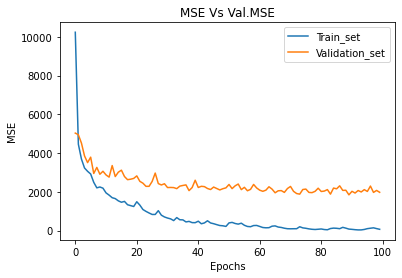

In [169]:
# Now summarize the history for mean_squared_error
import matplotlib.pyplot as plt
plt.plot(Result2.history['mean_squared_error'])
plt.plot(Result2.history['val_mean_squared_error'])
plt.title('MSE Vs Val.MSE')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend(['Train_set' , 'Validation_set'], loc='upper right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

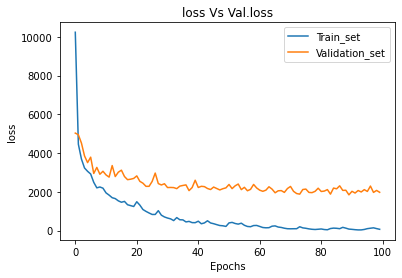

In [170]:
# Now summarize the history for loss
import matplotlib.pyplot as plt
plt.plot(Result2.history['loss'])
plt.plot(Result2.history['val_loss'])
plt.title('loss Vs Val.loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Train_set' , 'Validation_set'], loc='upper right')
plt.show